# A. 주차장 정보 시각화 현황 분석 

- 대구광역시 주차장의 특성별 분포도를 확인하여 지역적 특성에 활용합니다.

## 🗂️ 라이브러리

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상 방지 

In [4]:
import seaborn as sns

In [5]:
import numpy as np

## 📍 Fixed Random Seed

In [6]:
import os
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## 📍 데이터 불러오기 및 상위행 확인
- 주차장정보, train, test 파일을 로드하여 상위행을 확인

In [7]:
park_org = pd.read_csv('./data/external_open/대구 주차장 정보.csv', encoding='cp949', low_memory=False, 
                      index_col='주차장관리번호')
park_org.head(3)

,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,08:00,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,08:00,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,08:00,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01


In [8]:
park_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 153-2-000001 to 150-4-000146
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   주차장명         871 non-null    object 
 1   주차장구분        871 non-null    object 
 2   주차장유형        871 non-null    object 
 3   소재지도로명주소     674 non-null    object 
 4   소재지지번주소      775 non-null    object 
 5   주차구획수        871 non-null    int64  
 6   급지구분         871 non-null    int64  
 7   부제시행구분       871 non-null    object 
 8   운영요일         871 non-null    object 
 9   평일운영시작시각     871 non-null    object 
 10  평일운영종료시각     871 non-null    object 
 11  토요일운영시작시각    871 non-null    object 
 12  토요일운영종료시각    871 non-null    object 
 13  공휴일운영시작시각    871 non-null    object 
 14  공휴일운영종료시각    871 non-null    object 
 15  요금정보         871 non-null    object 
 16  주차기본시간       871 non-null    int64  
 17  주차기본요금       871 non-null    int64  
 18  추가단위시간       298 non-null    float6

In [9]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

display(train.head())
display(test.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


## 📍 데이터 기간 확인하기 
- 주차장정보, train, test 데이터의 기간 확인

In [10]:
display(f"park : {park_org.iloc[0]['데이터기준일자']} ~ {park_org.iloc[-1]['데이터기준일자']}")
display(f"train : {train.iloc[0]['사고일시']} ~ {train.iloc[-1]['사고일시']}")
display(f"test : {test.iloc[0]['사고일시']} ~ {test.iloc[-1]['사고일시']}")

'park : 2020-01-01 ~ 2019-06-21'

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

- 주차장정보 데이터의 경우 시간 순서대로 정렬되어 있지 않아 데이터 전처리하여 기간 확인 필요
  1. 년/월/일 기준으로 컬럼 분리 및 수치화
  2. 오름차순으로 정렬 하여 기간 확인

In [11]:
# 전처리 된 데이터 park_df 로 저장 
park_df = park_org.copy()

In [12]:
# 날짜 데이터 전처리 진행 
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2})'

park_df[['연', '월', '일']] = park_org['데이터기준일자'].str.extract(time_pattern)
park_df[['연', '월', '일']] = park_df[['연', '월', '일']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
park_df = park_df.drop(columns=['데이터기준일자']) # 정보 추출이 완료된 '데이터기준일자' 컬럼은 제거합니다

In [13]:
# 전처리 결과 확인 
print(f"park_df 의 컬럼 : {park_df.columns}")
print(f"park_df 의 '연' 데이터 : {park_df['연'].unique()}")
print(f"park_df 의 '월' 데이터 : {park_df['월'].unique()}")
print(f"park_df 의 '일' 데이터 : {park_df['일'].unique()}")

park_df 의 컬럼 : Index(['주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수', '급지구분',
       '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각',
       '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금', '추가단위시간',
       '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '위도',
       '경도', '연', '월', '일'],
      dtype='object')
park_df 의 '연' 데이터 : [2020 2019]
park_df 의 '월' 데이터 : [1 3 9 2 6]
park_df 의 '일' 데이터 : [ 1 17 10 14 11 24 21]


In [14]:
# 기간 확인 
date_sort = park_df.sort_values(by=["연", "월", "일"], ascending=True) 

In [15]:
display(date_sort.head(1))
display(date_sort.tail(1))

,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,연,월,일
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
155-2-000001,어린이회관공영주차장,공영,노외,대구광역시 수성구 동대구로 176,대구광역시 수성구 황금동 626,195,2,미시행,평일+토요일+공휴일,07:00,...,0.0,0.0,0.0,카드,NaN,35.846921,128.6272,2019,6,1


,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,연,월,일
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
156-1-000113,신당로 노상주차장,공영,노상,대구광역시 달서구 신당로 16,대구광역시 달서구 신당동 1815,84,3,미시행,평일+토요일+공휴일,00:00,...,NaN,NaN,NaN,NaN,NaN,35.853504,128.493924,2020,3,17


- park : 2019-06-01 ~ 2020-03-17
- train : 2019-01-01 00 ~ 2021-12-31 23
- test : 2022-01-01 01 ~ 2022-12-31 21

## 📍 데이터 전처리

### 파생 변수 생성 1 : 날짜정보 생성
- '데이터기준일자' 컬럼으로 부터 연도, 월, 일 정보 추출 및 변환

In [16]:
# 위에서 데이터 기간 확인하면서 전처리 진행함
display(park_df.head(3))

,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,연,월,일
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,08:00,...,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020,1,1
153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,08:00,...,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020,1,1
153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,08:00,...,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020,1,1


### 파생 변수 생성 2 : 공간(위치) 정보 생성
- '소재지지번주소' 컬럼으로 부터 시, 구, 동 정보를 추출 및 변환

In [17]:
# 데이터 확인
set(park_df['소재지지번주소'])

{nan,
 '대구광역시 남구 대명동 1150-3',
 '대구광역시 남구 대명동 1158-9',
 '대구광역시 남구 대명동 1225-31',
 '대구광역시 남구 대명동 1430-4',
 '대구광역시 남구 대명동 1800-14',
 '대구광역시 남구 대명동 1803-10',
 '대구광역시 남구 대명동 1809-5',
 '대구광역시 남구 대명동 200-14',
 '대구광역시 남구 대명동 2014-62',
 '대구광역시 남구 대명동 2152-5',
 '대구광역시 남구 대명동 2277-2',
 '대구광역시 남구 대명동 3024-6',
 '대구광역시 남구 대명동 3029-8',
 '대구광역시 남구 대명동 501-3',
 '대구광역시 남구 대명동 51-1',
 '대구광역시 남구 대명동 584-4',
 '대구광역시 남구 대명동 614-6',
 '대구광역시 남구 대명동 794-4',
 '대구광역시 남구 대명동 874-9',
 '대구광역시 남구 대명동 902-14',
 '대구광역시 남구 대명동 982-7',
 '대구광역시 남구 봉덕동 1002-69',
 '대구광역시 남구 봉덕동 1256',
 '대구광역시 남구 봉덕동 1272-18',
 '대구광역시 남구 봉덕동 1350-1',
 '대구광역시 남구 봉덕동 523-15',
 '대구광역시 남구 봉덕동 538-3',
 '대구광역시 남구 봉덕동 540-1',
 '대구광역시 남구 봉덕동 543-5',
 '대구광역시 남구 봉덕동 687-8',
 '대구광역시 남구 봉덕동 705-8',
 '대구광역시 남구 봉덕동 750-3',
 '대구광역시 남구 봉덕동 976-5',
 '대구광역시 남구 이천동 193-14',
 '대구광역시 남구 이천동 291-4',
 '대구광역시 남구 이천동 408-12',
 '대구광역시 달서구 갈산동 358',
 '대구광역시 달서구 감삼동 123',
 '대구광역시 달서구 감삼동 203-6',
 '대구광역시 달서구 감삼동 54-6',
 '대구광역시 달서구 감삼동 63-8',
 '대구광역시 달서구 도원동 670',
 '대구광역

In [18]:
# '공백' 기준 시군구 분리 
location_pattern = r'(\S+) (\S+) (\S+)'

park_df[['도시', '구', '동']] = park_org['소재지지번주소'].str.extract(location_pattern)
park_df = park_df.drop(columns=['소재지지번주소'])

In [19]:
print(f"park_df 의 컬럼 : {park_df.columns}")
print(f"park_df 의 '도시' 데이터 : {park_df['도시'].unique()}")
print(f"park_df 의 '구' 데이터 : {park_df['구'].unique()}")
print(f"park_df 의 '동' 데이터 : {park_df['동'].unique()}")

park_df 의 컬럼 : Index(['주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '주차구획수', '급지구분', '부제시행구분', '운영요일',
       '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각',
       '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금', '추가단위시간', '추가단위요금',
       '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '위도', '경도', '연',
       '월', '일', '도시', '구', '동'],
      dtype='object')
park_df 의 '도시' 데이터 : ['대구광역시' nan]
park_df 의 '구' 데이터 : ['남구' nan '달서구' '달성군' '동구' '북구' '서구' '수성구' '중구']
park_df 의 '동' 데이터 : ['봉덕동' '대명동' '이천동' nan '상인동' '용산동' '장기동' '본리동' '진천동' '도원동' '호림동' '호산동'
 '본동' '송현동' '감삼동' '성당동' '두류동' '신당동' '죽전동' '이곡동' '월성동' '월암동' '갈산동' '장동'
 '파호동' '화원읍' '논공읍' '다사읍' '옥포면' '현풍면' '구지면' '유곡리' '유가읍' '가창면' '하빈면' '신천동'
 '지저동' '율하동' '신암동' '방촌동' '율암동' '불로동' '신기동' '동호동' '도동' '미대동' '칠성동2가' '복현동'
 '동천동' '구암동' '노원동3가' '관음동' '읍내동' '노곡동' '노원동1가' '칠성동1가' '대현동' '동변동' '노원동2가'
 '산격동' '검단동' '고성동2가' '고성동3가' '고성동1가' '침산동' '태전동' '서변동' '팔달동' '조야동' '비산동'
 '평리동' '중리동' '내당동' '상리동' '원대동1가' '이현동' '내당4동' '원대동3가' '황금동' '지산동' '매호동'
 '

In [20]:
# '동' 데이터 중 불필요하게 딸려온 번지주소 제거 (e.g. '황금동672-1' '범어동881-7')

## Index 확인
display(park_df.loc[park_df['동'] == '황금동672-1']) # 155-1-000020
display(park_df.loc[park_df['동'] == '범어동881-7']) # 155-1-000021

,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
155-1-000020,범어천로노상공영3주차장,공영,노상,대구광역시 수성구 동대구로45길 11,125,2,미시행,평일+토요일,08:00,20:00,...,현금,NaN,35.850372,128.624146,2019,6,1,대구광역시,수성구,황금동672-1


,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
155-1-000021,범어천로노상공영4주차장,공영,노상,대구광역시 수성구 범어천로 135,31,1,미시행,평일+토요일,08:00,20:00,...,현금,NaN,35.858817,128.622143,2019,6,1,대구광역시,수성구,범어동881-7


In [21]:
## 변경
park_df.replace({'동':{'범어동881-7':'범어동'}}, inplace=True)
park_df.replace({'동':{'황금동672-1':'황금동'}}, inplace=True)

In [22]:
## 확인
display(park_df.loc[park_df.index == '155-1-000020'])
display(park_df.loc[park_df.index == '155-1-000021']) 
print(f"park_df 의 '동' 데이터 : {park_df['동'].unique()}")

,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
155-1-000020,범어천로노상공영3주차장,공영,노상,대구광역시 수성구 동대구로45길 11,125,2,미시행,평일+토요일,08:00,20:00,...,현금,NaN,35.850372,128.624146,2019,6,1,대구광역시,수성구,황금동


,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
155-1-000021,범어천로노상공영4주차장,공영,노상,대구광역시 수성구 범어천로 135,31,1,미시행,평일+토요일,08:00,20:00,...,현금,NaN,35.858817,128.622143,2019,6,1,대구광역시,수성구,범어동


park_df 의 '동' 데이터 : ['봉덕동' '대명동' '이천동' nan '상인동' '용산동' '장기동' '본리동' '진천동' '도원동' '호림동' '호산동'
 '본동' '송현동' '감삼동' '성당동' '두류동' '신당동' '죽전동' '이곡동' '월성동' '월암동' '갈산동' '장동'
 '파호동' '화원읍' '논공읍' '다사읍' '옥포면' '현풍면' '구지면' '유곡리' '유가읍' '가창면' '하빈면' '신천동'
 '지저동' '율하동' '신암동' '방촌동' '율암동' '불로동' '신기동' '동호동' '도동' '미대동' '칠성동2가' '복현동'
 '동천동' '구암동' '노원동3가' '관음동' '읍내동' '노곡동' '노원동1가' '칠성동1가' '대현동' '동변동' '노원동2가'
 '산격동' '검단동' '고성동2가' '고성동3가' '고성동1가' '침산동' '태전동' '서변동' '팔달동' '조야동' '비산동'
 '평리동' '중리동' '내당동' '상리동' '원대동1가' '이현동' '내당4동' '원대동3가' '황금동' '지산동' '매호동'
 '신매동' '노변동' '삼덕동' '범어동' '중동' '만촌동' '욱수동' '수성동4가' '전동' '동인동4가' '대신동'
 '태평로1가' '삼덕동2가' '향촌동' '삼덕동1가' '봉산동' '남성로' '교동' '동인동1가' '계산동1가' '남산동'
 '공평동' '동인동2가' '북성로1가' '문화동' '태평로2가' '동성로3가' '대봉동' '북내동' '시장북로' '달성동'
 '수창동' '화전동' '계산동2가' '포정동' '수동' '장관동' '남일동' '종로1가' '종로2가' '동산동' '동일동'
 '인교동' '서문로1가' '대안동' '서성로2가' '동문동' '태평로3가' '삼덕동3가' '동인동3가' '상서동' '서야동'
 '완전동']


### 데이터 수정 1 : 요금정보
- `무료/유료/혼합` -> `무료/유료` (유료&혼합 통일; 요금 특성 차이가 없음)

In [23]:
# 데이터 확인
print(set(park_df['요금정보']))
print(park_df['요금정보'].value_counts())

{'유료', '혼합', '무료'}
요금정보
무료    527
유료    316
혼합     28
Name: count, dtype: int64


In [24]:
# 혼합 -> 유료로 변경 
park_df = park_df.replace({'요금정보':'혼합'}, '유료')

In [25]:
print(set(park_df['요금정보']))
print(park_df['요금정보'].value_counts())

{'유료', '무료'}
요금정보
무료    527
유료    344
Name: count, dtype: int64


### 전처리 결과 확인

In [26]:
park_df.head()

,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,62,1,미시행,평일+토요일+공휴일,08:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020,1,1,대구광역시,남구,봉덕동
153-2-000002,봉삼공영주차장,공영,노외,NaN,36,1,미시행,평일+토요일+공휴일,08:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020,1,1,대구광역시,남구,봉덕동
153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,31,1,미시행,평일+토요일+공휴일,08:00,20:00,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020,1,1,대구광역시,남구,대명동
153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,88,2,미시행,평일+토요일+공휴일,08:00,20:00,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020,1,1,대구광역시,남구,봉덕동
153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,32,1,미시행,평일+토요일+공휴일,00:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020,1,1,대구광역시,남구,봉덕동


## 📍 시각화 분석 | 위치별 각 공간적 특성 분포도 확인  

### A. 구별 주차장 유형 분포도 (노상/노외)

In [27]:
place_count_gu = park_df.groupby('구')['주차장유형'].value_counts()

In [28]:
tmp = place_count_gu.to_frame()

In [29]:
tmp.index

MultiIndex([( '남구', '노외'),
            ( '남구', '노상'),
            ('달서구', '노외'),
            ('달서구', '노상'),
            ('달성군', '노상'),
            ('달성군', '노외'),
            ( '동구', '노외'),
            ( '동구', '노상'),
            ( '북구', '노상'),
            ( '북구', '노외'),
            ( '서구', '노상'),
            ( '서구', '노외'),
            ('수성구', '노외'),
            ('수성구', '노상'),
            ( '중구', '노외'),
            ( '중구', '노상')],
           names=['구', '주차장유형'])

In [30]:
place_count_gu_df = tmp.unstack()

In [31]:
place_count_gu_df.index

Index(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype='object', name='구')

<Axes: title={'center': '구별 주차장 유형 분포'}, xlabel='구'>

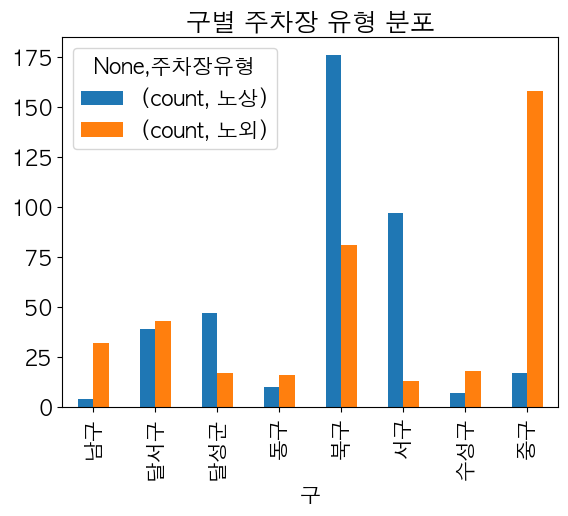

In [32]:
place_count_gu_df.plot(kind='bar', title='구별 주차장 유형 분포')

### (A-1. 동별 주차장 유형 분포도 (노상/노외))
- 동별로 데이터를 구분할 시, 값이 너무 많아져서 시각화 분석에 적합하지 않아 보임

In [33]:
place_count_dong = park_df.groupby('동')['주차장유형'].value_counts()
tmp2 = place_count_dong.to_frame()
place_count_dong_df = tmp2.unstack()
place_count_dong_df.index

Index(['가창면', '갈산동', '감삼동', '검단동', '계산동1가', '계산동2가', '고성동1가', '고성동2가', '고성동3가',
       '공평동',
       ...
       '평리동', '포정동', '하빈면', '향촌동', '현풍면', '호림동', '호산동', '화원읍', '화전동', '황금동'],
      dtype='object', name='동', length=133)

In [34]:
place_count_dong.info()

<class 'pandas.core.series.Series'>
MultiIndex: 183 entries, ('가창면', '노외') to ('황금동', '노상')
Series name: count
Non-Null Count  Dtype
--------------  -----
183 non-null    int64
dtypes: int64(1)
memory usage: 3.2+ KB


<Axes: title={'center': '동별 주차장 유형 분포'}, xlabel='동'>

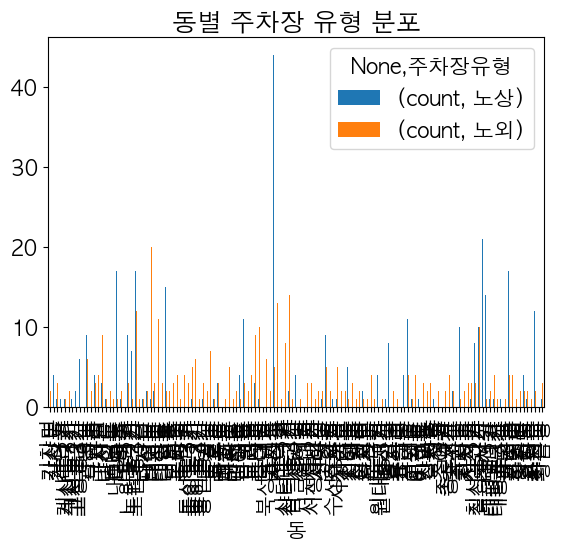

In [35]:
place_count_dong_df.plot(kind='bar', title='동별 주차장 유형 분포')

### B. 구별 주차장 구분 분포도 (공영/민영)

In [36]:
type_count_gu = park_df.groupby('구')['주차장구분'].value_counts()
tmp3 = type_count_gu.to_frame()
type_count_gu_df = tmp3.unstack()
type_count_gu_df.index

Index(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype='object', name='구')

<Axes: title={'center': '구별 주차장 구분 분포'}, xlabel='구'>

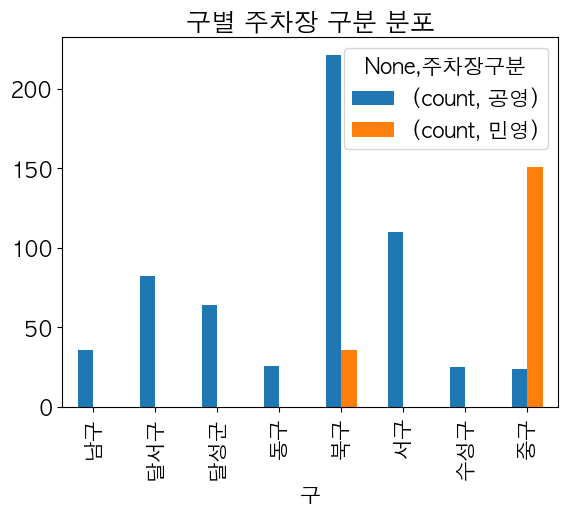

In [37]:
type_count_gu_df.plot(kind='bar', title='구별 주차장 구분 분포')

### C. 구별 무료/유료 주차장 (요금정보)

In [38]:
fare_count_gu = park_df.groupby('구')['요금정보'].value_counts()
tmp4 = fare_count_gu.to_frame()
fare_count_gu_df = tmp4.unstack()
fare_count_gu_df.index

Index(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype='object', name='구')

<Axes: title={'center': '구별 무료/유료 주차장 분포'}, xlabel='구'>

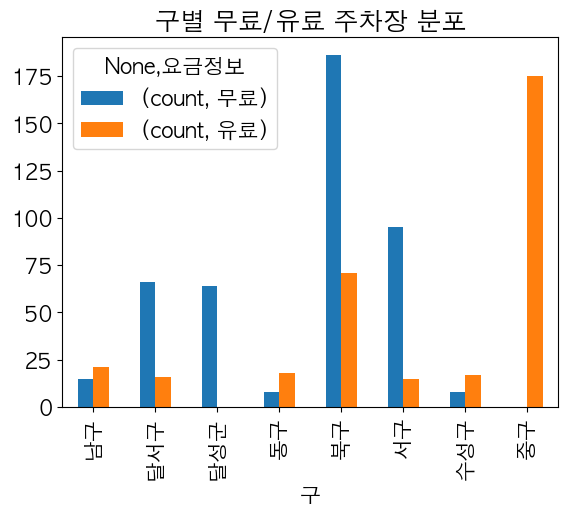

In [39]:
fare_count_gu_df.plot(kind='bar', title='구별 무료/유료 주차장 분포')

### D. 구별 평균주차요금 및 Min/Max 주차요금 

In [40]:
park_df.head()

,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,62,1,미시행,평일+토요일+공휴일,08:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020,1,1,대구광역시,남구,봉덕동
153-2-000002,봉삼공영주차장,공영,노외,NaN,36,1,미시행,평일+토요일+공휴일,08:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020,1,1,대구광역시,남구,봉덕동
153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,31,1,미시행,평일+토요일+공휴일,08:00,20:00,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020,1,1,대구광역시,남구,대명동
153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,88,2,미시행,평일+토요일+공휴일,08:00,20:00,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020,1,1,대구광역시,남구,봉덕동
153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,32,1,미시행,평일+토요일+공휴일,00:00,23:59,...,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020,1,1,대구광역시,남구,봉덕동


In [41]:
tmp5 = park_df.groupby(['구', '요금정보']).agg({'주차기본요금':['min', 'max', 'mean']})

In [42]:
tmp5

주차기본요금                   
            min   max         mean
구   요금정보                          
남구  무료        0     0     0.000000
    유료      200   600   366.666667
달서구 무료        0     0     0.000000
    유료      200   400   275.000000
달성군 무료        0     0     0.000000
동구  무료        0     0     0.000000
    유료      400  1000   644.444444
북구  무료        0  1000     5.376344
    유료      300  2000   794.366197
서구  무료        0     0     0.000000
    유료      400  1000   640.000000
수성구 무료        0     0     0.000000
    유료        0  1000   564.705882
중구  유료        0  2000  1033.142857

In [43]:
# '북구' 데이터 중 '무료-1000' 유료인데 잘못 태깅되어서 유료로 분류
## 해당 데이터 확인
park_df[(park_df['요금정보']=='무료') & (park_df['주차기본요금']==1000)]

,주차장명,주차장구분,주차장유형,소재지도로명주소,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,평일운영종료시각,...,결제방법,특기사항,위도,경도,연,월,일,도시,구,동
주차장관리번호,,,,,,,,,,,,,,,,,,,,,
154-1-000126,지하철대구역인근,공영,노상,NaN,9,1,미시행,평일+토요일+공휴일,00:00,00:00,...,NaN,NaN,35.876047,128.599077,2020,2,11,대구광역시,북구,칠성동2가


In [44]:
tmp_val = park_df.loc['154-1-000126']
tmp_val

주차장명             지하철대구역인근
주차장구분                  공영
주차장유형                  노상
소재지도로명주소              NaN
주차구획수                   9
급지구분                    1
부제시행구분                미시행
운영요일           평일+토요일+공휴일
평일운영시작시각            00:00
평일운영종료시각            00:00
토요일운영시작시각           00:00
토요일운영종료시각           00:00
공휴일운영시작시각           00:00
공휴일운영종료시각           00:00
요금정보                   무료
주차기본시간                 30
주차기본요금               1000
추가단위시간               10.0
추가단위요금              500.0
1일주차권요금적용시간           NaN
1일주차권요금           10000.0
월정기권요금           100000.0
결제방법                  NaN
특기사항                  NaN
위도              35.876047
경도             128.599077
연                    2020
월                       2
일                      11
도시                  대구광역시
구                      북구
동                   칠성동2가
Name: 154-1-000126, dtype: object

In [45]:
park_df.loc['154-1-000126', '요금정보'] = '유료'

In [46]:
park_df.loc['154-1-000126']

주차장명             지하철대구역인근
주차장구분                  공영
주차장유형                  노상
소재지도로명주소              NaN
주차구획수                   9
급지구분                    1
부제시행구분                미시행
운영요일           평일+토요일+공휴일
평일운영시작시각            00:00
평일운영종료시각            00:00
토요일운영시작시각           00:00
토요일운영종료시각           00:00
공휴일운영시작시각           00:00
공휴일운영종료시각           00:00
요금정보                   유료
주차기본시간                 30
주차기본요금               1000
추가단위시간               10.0
추가단위요금              500.0
1일주차권요금적용시간           NaN
1일주차권요금           10000.0
월정기권요금           100000.0
결제방법                  NaN
특기사항                  NaN
위도              35.876047
경도             128.599077
연                    2020
월                       2
일                      11
도시                  대구광역시
구                      북구
동                   칠성동2가
Name: 154-1-000126, dtype: object

In [47]:
fee_count_gu_df = park_df.groupby(['구', '요금정보']).agg({'주차기본요금':['min', 'max', 'mean']})
fee_count_gu_df

주차기본요금                   
            min   max         mean
구   요금정보                          
남구  무료        0     0     0.000000
    유료      200   600   366.666667
달서구 무료        0     0     0.000000
    유료      200   400   275.000000
달성군 무료        0     0     0.000000
동구  무료        0     0     0.000000
    유료      400  1000   644.444444
북구  무료        0     0     0.000000
    유료      300  2000   797.222222
서구  무료        0     0     0.000000
    유료      400  1000   640.000000
수성구 무료        0     0     0.000000
    유료        0  1000   564.705882
중구  유료        0  2000  1033.142857

# B. 주차장 주요 피처와 ECLO 점수와의 상관관계 분석

- 데이터를 구별로 묶어 위 주차장 4가지 피처와 ECLO 평균점수와의 상관관계 분석

## 📍 데이터 전처리
- train 데이터 전처리 baseline 진행 (사고일시, 시군구, 도로형태)
- train 데이터 구별로 groupby & ECLO 평균값 

### 파생 변수 생성 1 : 날짜, 시간정보 생성

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

In [48]:
train_df = train.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

In [49]:
display(f"columns of train_df : {train_df.columns}")
display(train_df.head(3))

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간'],\n      dtype='object')"

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간
0,ACCIDENT_00000,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,중상,0,1,0,0,5,2019,1,1,0
1,ACCIDENT_00001,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,경상,0,0,1,0,3,2019,1,1,0
2,ACCIDENT_00002,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,경상,0,0,1,0,3,2019,1,1,1


### 파생 변수 생성 2 : 공간(위치) 정보 생성

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [50]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

In [51]:
display(f"columns of train_df : {train_df.columns}")
display(train_df.head(3))

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],\n      dtype='object')"

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,...,0,0,5,2019,1,1,0,대구광역시,중구,대신동
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,...,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동
2,ACCIDENT_00002,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,...,1,0,3,2019,1,1,1,대구광역시,수성구,두산동


### 파생 변수 추출 3 : 도로 형태 정보 추출

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [52]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

In [53]:
display(f"columns of train_df : {train_df.columns}")
display(train_df.head(3))

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타


### train 데이터 구별로 groupby
- '구' 컬럼으로 groupby 후, 평균값 낸 'ECLO' 컬럼 추출 

In [54]:
eclo_tmp = train_df[['구','ECLO']]
eclo_tmp.head(3)

,구,ECLO
0,중구,5
1,달서구,3
2,수성구,3


In [55]:
eclo_tmp2 = eclo_tmp.groupby('구')['ECLO'].mean()
eclo_gu = pd.DataFrame(eclo_tmp2)
eclo_gu.head(3)

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280


## 📍 주차장 주요 피처와 ECLO 점수와의 상관관계 분석
- 구별 주차장 유형 분포도 (노상/노외) <-> ECLO 평균값
- 구별 주차장 구분 분포도 (공영/민영) <-> ECLO 평균값
- 구별 요금정보 분포도 (무료/유료) <-> ECLO 평균값
- 구별 주차요금 평균금액/Min/Max <-> ECLO 평균값

### 구별 주차장 유형 분포도 (노상/노외) <-> ECLO 평균값

In [56]:
# '구'별로 groupby & ECLO 평균값 처리한 train 데이터
eclo_gu

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280
동구,4.889534
북구,4.687669
서구,4.775680
수성구,4.727300
중구,4.541610


In [57]:
# '구'별 주차장 유형 분포도 (노상/노외) 데이터 
place_count_gu_df

count     
주차장유형    노상   노외
구               
남구        4   32
달서구      39   43
달성군      47   17
동구       10   16
북구      176   81
서구       97   13
수성구       7   18
중구       17  158

In [58]:
# MultiIndex 컬럼 평탄화 하는 함수 
def flat_cols(df):
    df.columns = [' , '.join(x) for x in df.columns.to_flat_index()]
    return df

In [59]:
# place_count_gu_df 평탄화
place_flt = place_count_gu_df.pipe(flat_cols)

In [60]:
# column 명 바꿔주기 
place_flt.columns = ['노상', '노외']
place_flt

,노상,노외
구,,
남구,4,32
달서구,39,43
달성군,47,17
동구,10,16
북구,176,81
서구,97,13
수성구,7,18
중구,17,158


In [61]:
# 두 데이터 merge
eclo_place = pd.merge(eclo_gu, place_flt, on='구', how='left')
eclo_place

,ECLO,노상,노외
구,,,
남구,4.623681,4,32
달서구,4.618441,39,43
달성군,5.072280,47,17
동구,4.889534,10,16
북구,4.687669,176,81
서구,4.775680,97,13
수성구,4.727300,7,18
중구,4.541610,17,158


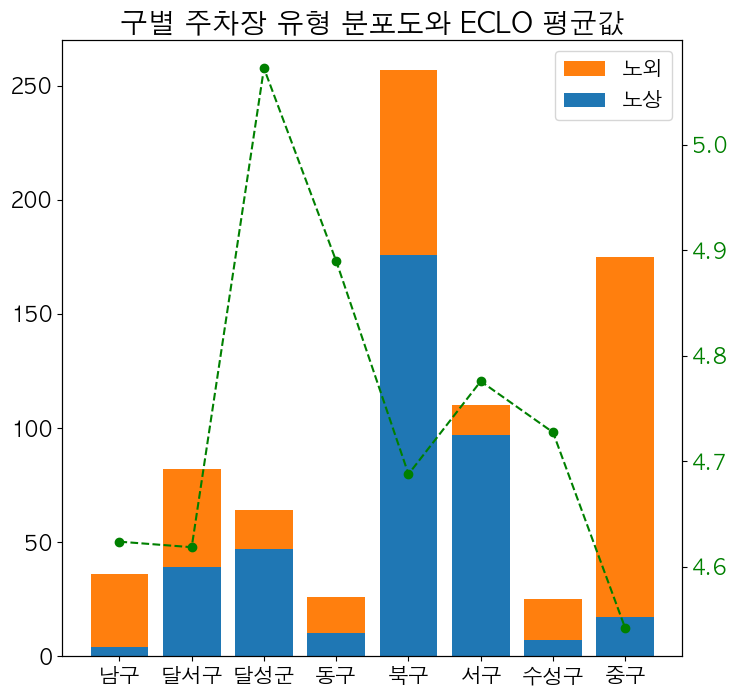

In [62]:
# 시각화

## figure setting
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

## stacked bar graph
N = 8
ind = np.arange(N)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
upper = eclo_place['노외']
bottom = eclo_place['노상']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)
ax1_p1 = ax1.bar(ind, bottom)
ax1_p2 = ax1.bar(ind, upper,
             bottom=bottom)
ax1.legend((ax1_p2[0], ax1_p1[0]), ('노외', '노상'))

## line graph
eclo = eclo_place['ECLO']
color = 'green'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 주차장 유형 분포도와 ECLO 평균값', fontsize=20)
plt.show()

### 구별 주차장 구분 분포도 (공영/민영) <-> ECLO 평균값

In [63]:
# '구'별로 groupby & ECLO 평균값 처리한 train 데이터
display(eclo_gu)
# '구'별 주차장 구분 분포도 (공영/민영) 데이터 
display(type_count_gu_df)

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280
동구,4.889534
북구,4.687669
서구,4.775680
수성구,4.727300
중구,4.541610


count       
주차장구분     공영     민영
구                  
남구      36.0    NaN
달서구     82.0    NaN
달성군     64.0    NaN
동구      26.0    NaN
북구     221.0   36.0
서구     110.0    NaN
수성구     25.0    NaN
중구      24.0  151.0

In [64]:
# type_count_gu_df 평탄화
type_flt = type_count_gu_df.pipe(flat_cols)

In [65]:
# column 명 바꿔주기 
type_flt.columns = ['공영', '민영']
type_flt

,공영,민영
구,,
남구,36.0,NaN
달서구,82.0,NaN
달성군,64.0,NaN
동구,26.0,NaN
북구,221.0,36.0
서구,110.0,NaN
수성구,25.0,NaN
중구,24.0,151.0


In [66]:
# 결측치 NaN -> 0 수치화 처리 
print('결측치 제거 전:\n', type_flt.isna().sum())

결측치 제거 전:
 공영    0
민영    6
dtype: int64


In [67]:
type_flt['민영'] = type_flt['민영'].fillna(0)
print('결측치 제거 후:\n', type_flt.isna().sum())

결측치 제거 후:
 공영    0
민영    0
dtype: int64


In [68]:
# 두 데이터 merge
eclo_type = pd.merge(eclo_gu, type_flt, on='구', how='left')
eclo_type

,ECLO,공영,민영
구,,,
남구,4.623681,36.0,0.0
달서구,4.618441,82.0,0.0
달성군,5.072280,64.0,0.0
동구,4.889534,26.0,0.0
북구,4.687669,221.0,36.0
서구,4.775680,110.0,0.0
수성구,4.727300,25.0,0.0
중구,4.541610,24.0,151.0


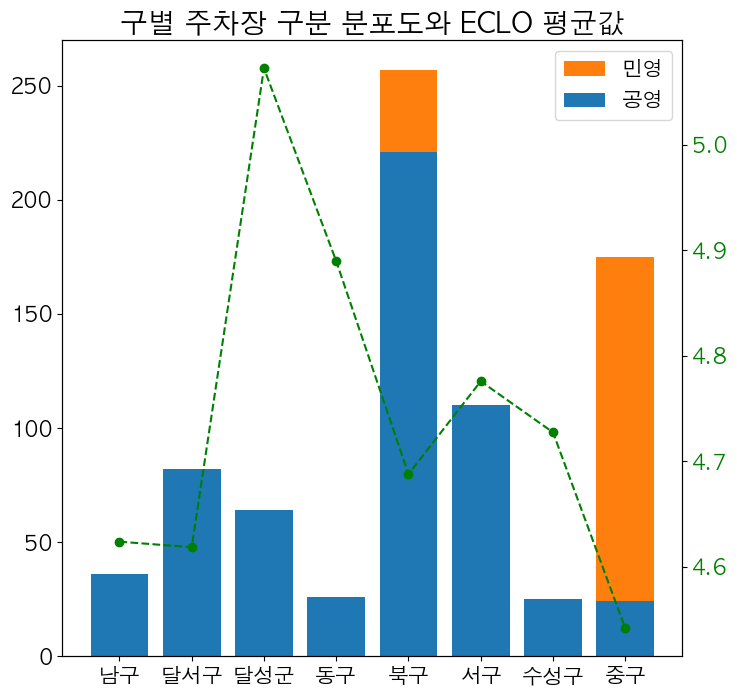

In [69]:
# 시각화

## figure setting
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

## stacked bar graph
N = 8
ind = np.arange(N)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
upper = eclo_type['민영']
bottom = eclo_type['공영']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)
ax1_p1 = ax1.bar(ind, bottom)
ax1_p2 = ax1.bar(ind, upper,
             bottom=bottom)
ax1.legend((ax1_p2[0], ax1_p1[0]), ('민영', '공영'))

## line graph
eclo = eclo_type['ECLO']
color = 'green'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 주차장 구분 분포도와 ECLO 평균값', fontsize=20)
plt.show()

### 구별 요금정보 분포도 (무료/유료) <-> ECLO 평균값

In [70]:
# '구'별로 groupby & ECLO 평균값 처리한 train 데이터
display(eclo_gu)
# '구'별 요금정보 분포도 (무료/유료) 데이터 
display(fare_count_gu_df)

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280
동구,4.889534
북구,4.687669
서구,4.775680
수성구,4.727300
중구,4.541610


count       
요금정보     무료     유료
구                 
남구     15.0   21.0
달서구    66.0   16.0
달성군    64.0    NaN
동구      8.0   18.0
북구    186.0   71.0
서구     95.0   15.0
수성구     8.0   17.0
중구      NaN  175.0

In [71]:
# fare_count_gu_df 평탄화
fare_flt = fare_count_gu_df.pipe(flat_cols)
# column 명 바꿔주기 
fare_flt.columns = ['무료', '유료']
fare_flt

,무료,유료
구,,
남구,15.0,21.0
달서구,66.0,16.0
달성군,64.0,NaN
동구,8.0,18.0
북구,186.0,71.0
서구,95.0,15.0
수성구,8.0,17.0
중구,NaN,175.0


In [72]:
# 결측치 NaN -> 0 수치화 처리 
print('결측치 제거 전:\n', fare_flt.isna().sum())

결측치 제거 전:
 무료    1
유료    1
dtype: int64


In [73]:
fare_flt['무료'] = fare_flt['무료'].fillna(0)
fare_flt['유료'] = fare_flt['유료'].fillna(0)
print('결측치 제거 후:\n', fare_flt.isna().sum())

결측치 제거 후:
 무료    0
유료    0
dtype: int64


In [74]:
# 두 데이터 merge
eclo_fare = pd.merge(eclo_gu, fare_flt, on='구', how='left')
eclo_fare

,ECLO,무료,유료
구,,,
남구,4.623681,15.0,21.0
달서구,4.618441,66.0,16.0
달성군,5.072280,64.0,0.0
동구,4.889534,8.0,18.0
북구,4.687669,186.0,71.0
서구,4.775680,95.0,15.0
수성구,4.727300,8.0,17.0
중구,4.541610,0.0,175.0


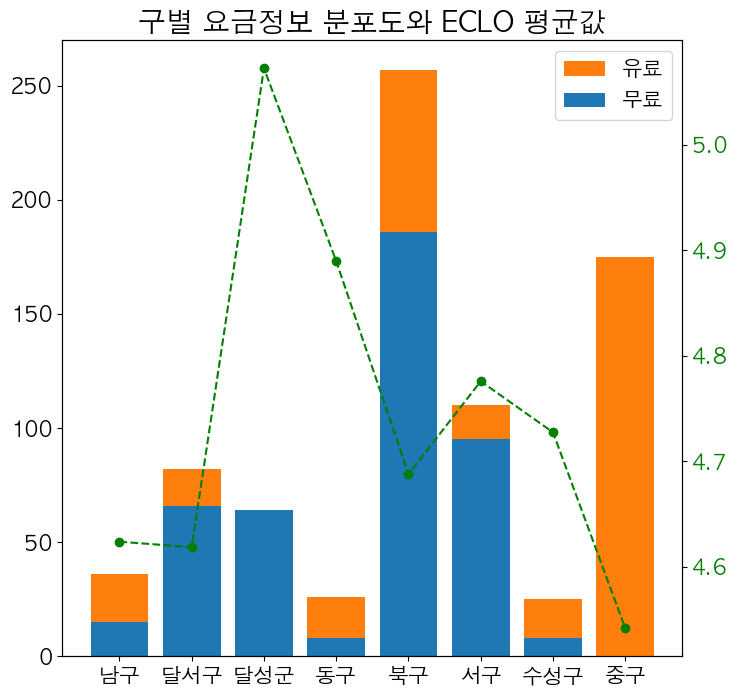

In [75]:
# 시각화

## figure setting
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

## stacked bar graph
N = 8
ind = np.arange(N)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
upper = eclo_fare['유료']
bottom = eclo_fare['무료']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)
ax1_p1 = ax1.bar(ind, bottom)
ax1_p2 = ax1.bar(ind, upper,
             bottom=bottom)
ax1.legend((ax1_p2[0], ax1_p1[0]), ('유료', '무료'))

## line graph
eclo = eclo_fare['ECLO']
color = 'green'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 요금정보 분포도와 ECLO 평균값', fontsize=20)
plt.show()

### 구별 주차요금 평균금액/Min/Max <-> ECLO 평균값

In [76]:
# '구'별로 groupby & ECLO 평균값 처리한 train 데이터
display(eclo_gu)
# '구'별 요금정보 분포도 (무료/유료) 데이터 
display(fee_count_gu_df)

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280
동구,4.889534
북구,4.687669
서구,4.775680
수성구,4.727300
중구,4.541610


주차기본요금                   
            min   max         mean
구   요금정보                          
남구  무료        0     0     0.000000
    유료      200   600   366.666667
달서구 무료        0     0     0.000000
    유료      200   400   275.000000
달성군 무료        0     0     0.000000
동구  무료        0     0     0.000000
    유료      400  1000   644.444444
북구  무료        0     0     0.000000
    유료      300  2000   797.222222
서구  무료        0     0     0.000000
    유료      400  1000   640.000000
수성구 무료        0     0     0.000000
    유료        0  1000   564.705882
중구  유료        0  2000  1033.142857

In [77]:
# fee_count_gu_df 평탄화
fee_flt = fee_count_gu_df.pipe(flat_cols)
fee_flt

주차기본요금 , min  주차기본요금 , max  주차기본요금 , mean
구   요금정보                                           
남구  무료               0             0       0.000000
    유료             200           600     366.666667
달서구 무료               0             0       0.000000
    유료             200           400     275.000000
달성군 무료               0             0       0.000000
동구  무료               0             0       0.000000
    유료             400          1000     644.444444
북구  무료               0             0       0.000000
    유료             300          2000     797.222222
서구  무료               0             0       0.000000
    유료             400          1000     640.000000
수성구 무료               0             0       0.000000
    유료               0          1000     564.705882
중구  유료               0          2000    1033.142857

In [78]:
# column 명 바꿔주기 
fee_flt.columns = ['min', 'max', 'mean']
fee_flt

min   max         mean
구   요금정보                        
남구  무료      0     0     0.000000
    유료    200   600   366.666667
달서구 무료      0     0     0.000000
    유료    200   400   275.000000
달성군 무료      0     0     0.000000
동구  무료      0     0     0.000000
    유료    400  1000   644.444444
북구  무료      0     0     0.000000
    유료    300  2000   797.222222
서구  무료      0     0     0.000000
    유료    400  1000   640.000000
수성구 무료      0     0     0.000000
    유료      0  1000   564.705882
중구  유료      0  2000  1033.142857

In [134]:
# 두 데이터 merge
eclo_fee = pd.merge(eclo_gu, fee_flt, on='구', how='left')
eclo_fee

,ECLO,min,max,mean
구,,,,
남구,4.623681,0,0,0.000000
남구,4.623681,200,600,366.666667
달서구,4.618441,0,0,0.000000
달서구,4.618441,200,400,275.000000
달성군,5.072280,0,0,0.000000
동구,4.889534,0,0,0.000000
동구,4.889534,400,1000,644.444444
북구,4.687669,0,0,0.000000
북구,4.687669,300,2000,797.222222


In [138]:
# '무료'에 해당하는 행 삭제 (달성군 제외)
eclo_fee_fin = eclo_fee.copy()

In [139]:
eclo_fee_fin.reset_index(inplace=True)

In [140]:
idx = eclo_fee_fin[(eclo_fee_fin['min']==0) & (eclo_fee_fin['max']==0) & (eclo_fee_fin['ECLO']<5.072280)].index
idx

Index([0, 2, 5, 7, 9, 11], dtype='int64')

In [141]:
eclo_fee_fin.drop(idx, inplace=True)

In [142]:
eclo_fee_fin = eclo_fee_fin.set_index('구')

In [143]:
eclo_fee_fin

,ECLO,min,max,mean
구,,,,
남구,4.623681,200,600,366.666667
달서구,4.618441,200,400,275.000000
달성군,5.072280,0,0,0.000000
동구,4.889534,400,1000,644.444444
북구,4.687669,300,2000,797.222222
서구,4.775680,400,1000,640.000000
수성구,4.727300,0,1000,564.705882
중구,4.541610,0,2000,1033.142857


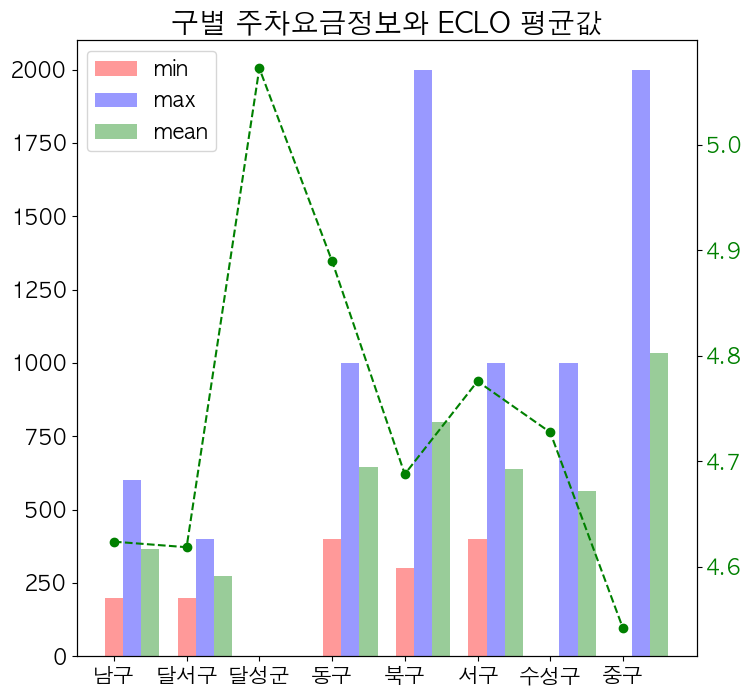

In [146]:
# 시각화

## figure setting
fig = plt.figure(figsize=(8,8))
bar_width = 0.25
fig.set_facecolor('white')

## multi-bar graph
N = 8
ind = np.arange(N)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)
ax1_p1 = ax1.bar(ind, eclo_fee_fin['min'], bar_width, alpha=0.4, color='red', label='min')
ax1_p2 = ax1.bar(ind + bar_width, eclo_fee_fin['max'], bar_width, alpha=0.4, color='blue', label='max')
ax1_p3 = ax1.bar(ind + 2 * bar_width, eclo_fee_fin['mean'], bar_width, alpha=0.4, color='green', label='mean')
ax1.legend()

## line graph
eclo = eclo_fee_fin['ECLO']
color = 'green'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 주차요금정보와 ECLO 평균값', fontsize=20)
plt.show()